In [171]:
# Importamos las librerías necesarias para nuestro código
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

In [172]:
# Leemos el archivo "Leon.txt" con la siguiente función para empezar a trabajar.
df0 = pd.read_csv('Leon.txt', skiprows=20, sep='\s+',skipfooter=1,engine='python',names=('Fecha','Precip','Evap','Tmax','Tmin'))

In [173]:
# Imprimimos los primeros renglones de la tabla para asegurarnos de que se haya leído correctamente.
df0.head()

,Fecha,Precip,Evap,Tmax,Tmin
0,01/01/1961,0.0,3.7,25,9
1,02/01/1961,0.0,4.7,25.5,8.5
2,03/01/1961,0.0,5.4,25,6
3,04/01/1961,0.0,4,24,6
4,05/01/1961,0.0,2.8,24.5,6


In [174]:
df = pd.DataFrame(df0)

In [175]:
# Remplazamos la palabra "Nulo" del archivo de texto por "NaN" para que python pueda leerlo como dato nulo.
df = df.replace('Nulo','NaN')

In [176]:
# Cambiamos los tipos de datos para poder empezar a trabajar con ellos de manera correcta y para que python los reconozca.
# Además cambiamos el tipo de dato de la fecha para que lo reconozca como fecha.
df['Fecha'] = pd.to_datetime(df.apply(lambda x: x['Fecha'], 1), dayfirst=True)
df['Precip'] = df['Precip'].astype(float)
df['Evap'] = df['Evap'].astype(float)
df['Tmax'] = df['Tmax'].astype(float)
df['Tmin'] = df['Tmin'].astype(float)

In [177]:
df['Tsum'] = df.Tmin + df.Tmax

In [178]:
df['Tprom'] = df.Tsum / 2

In [179]:
df.head()

,Fecha,Precip,Evap,Tmax,Tmin,Tsum,Tprom
0,1961-01-01,0.0,3.7,25.0,9.0,34.0,17.00
1,1961-01-02,0.0,4.7,25.5,8.5,34.0,17.00
2,1961-01-03,0.0,5.4,25.0,6.0,31.0,15.50
3,1961-01-04,0.0,4.0,24.0,6.0,30.0,15.00
4,1961-01-05,0.0,2.8,24.5,6.0,30.5,15.25


Text(0.5, 0, 'Días con heladas por año')

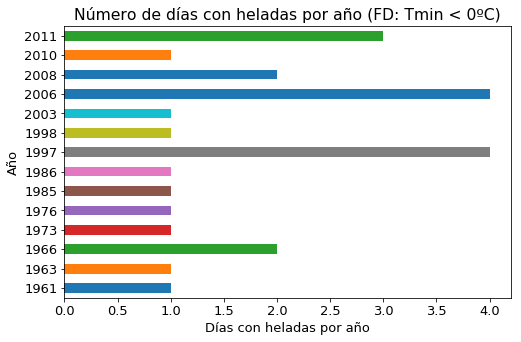

In [180]:
# Número de días con heladas por año (FD: Tmin < 0ºC)
fig = plt.figure(figsize=(8,5))
df_FD = df[df.Tmin < 0]
df_FD['Tmin'].groupby(df.Fecha.dt.year).agg('count').plot(kind = 'barh', legend = '')
plt.title('Número de días con heladas por año (FD: Tmin < 0ºC)')
plt.ylabel('Año')
plt.xlabel('Días con heladas por año')

Text(0.5, 0, 'Año')

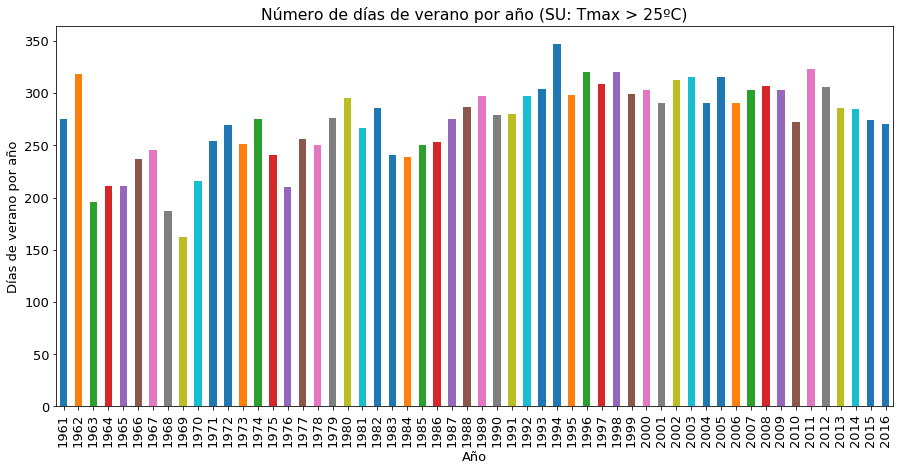

In [181]:
# Número de días de verano por año (SU: Tmax > 25ºC)

df_SU = df[df.Tmax > 25]

fig = plt.figure(figsize=(15,7))
df_SU['Tmax'].groupby(df.Fecha.dt.year).agg('count').plot(kind = 'bar', legend = '')
plt.title('Número de días de verano por año (SU: Tmax > 25ºC)')
plt.ylabel('Días de verano por año')
plt.xlabel('Año')

Text(0.5, 0, 'Noches Tropicales')

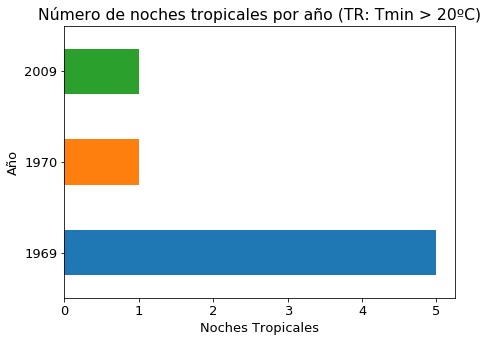

In [182]:
# Número de noches tropicales por año (TR: Tmin > 20ºC)

df_TR = df[df.Tmin > 20]

fig = plt.figure(figsize=(7,5))
df_TR['Tmin'].groupby(df.Fecha.dt.year).agg('count').plot(kind = 'barh', legend = '')
plt.title('Número de noches tropicales por año (TR: Tmin > 20ºC)')
plt.ylabel('Año')
plt.xlabel('Noches Tropicales')

In [214]:
# Primero creamos una columna nueva para tener los meses y días de cada año
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df.head()

,Fecha,Precip,Evap,Tmax,Tmin,Tsum,Tprom,Mes,Día
0,1961-01-01,0.0,3.7,25.0,9.0,34.0,17.00,1,1
1,1961-01-02,0.0,4.7,25.5,8.5,34.0,17.00,1,2
2,1961-01-03,0.0,5.4,25.0,6.0,31.0,15.50,1,3
3,1961-01-04,0.0,4.0,24.0,6.0,30.0,15.00,1,4
4,1961-01-05,0.0,2.8,24.5,6.0,30.5,15.25,1,5


In [215]:
# Seleccionamos los primeros 6 días del año
df_Ene = df[df.Mes <= 1]
df_FDays = df_Ene[df_Ene.Día <= 5]
df_GSL = df_FDays[df_FDays.Tprom > 6]
df_GSL
df_GSL['Tprom'].groupby([df.Fecha.dt.year, df.Mes]).agg('count')

Fecha  Mes
1961   1      5
1962   1      5
1963   1      5
1964   1      5
1965   1      5
1966   1      5
1967   1      5
1968   1      5
1970   1      5
1971   1      5
1972   1      5
1973   1      5
1974   1      5
1975   1      5
1976   1      5
1977   1      5
1978   1      5
1979   1      5
1980   1      5
1981   1      5
1982   1      5
1983   1      5
1984   1      4
1985   1      5
1986   1      5
1987   1      5
1988   1      5
1989   1      5
1990   1      5
1991   1      5
1992   1      5
1993   1      5
1994   1      5
1995   1      5
1996   1      5
1997   1      5
1998   1      5
1999   1      5
2000   1      5
2001   1      5
2002   1      5
2003   1      5
2004   1      5
2005   1      5
2006   1      5
2007   1      5
2008   1      5
2009   1      5
2010   1      5
2011   1      5
2012   1      5
2013   1      5
2014   1      5
2015   1      5
2016   1      5
Name: Tprom, dtype: int64

In [216]:
# Seleccionamos los últimos 6 días del año
df_Dic = df[df.Mes >= 12]
df_LDays = df_Dic[df_Dic.Día >= 27]
df_GSLf = df_LDays[df_LDays.Tprom < 5]
df_GSLf['Tprom'].groupby([df.Fecha.dt.year, df.Mes]).agg('count')

Series([], Name: Tprom, dtype: int64)

In [221]:
df.groupby(df.Fecha.dt.month)['Tmax'].max()

Fecha
1     31.0
2     34.5
3     37.0
4     38.5
5     40.0
6     39.0
7     37.0
8     37.5
9     36.0
10    36.0
11    38.0
12    33.0
Name: Tmax, dtype: float64

In [228]:
df.groupby(df.Fecha.dt.month)['Tmin'].max()

Fecha
1     13.0
2     13.0
3     15.0
4     18.0
5     22.0
6     21.0
7     20.0
8     19.0
9     19.0
10    17.5
11    16.5
12    15.0
Name: Tmin, dtype: float64

In [226]:
df.groupby(df.Fecha.dt.month)['Tmax'].min()

Fecha
1     10.0
2     11.5
3     10.5
4     13.0
5     17.5
6     19.0
7     20.0
8     19.0
9     17.0
10    16.0
11    14.0
12     9.5
Name: Tmax, dtype: float64

In [227]:
df.groupby(df.Fecha.dt.month)['Tmin'].min()

Fecha
1     -1.0
2     -5.0
3      1.0
4      4.5
5      7.0
6      8.0
7     10.0
8      9.0
9      4.0
10     2.0
11    -2.0
12    -6.5
Name: Tmin, dtype: float64

In [229]:
df['Tdif'] = df.Tmax - df.Tmin

In [230]:
df.head()

,Fecha,Precip,Evap,Tmax,Tmin,Tsum,Tprom,Mes,Día,Tdif
0,1961-01-01,0.0,3.7,25.0,9.0,34.0,17.00,1,1,16.0
1,1961-01-02,0.0,4.7,25.5,8.5,34.0,17.00,1,2,17.0
2,1961-01-03,0.0,5.4,25.0,6.0,31.0,15.50,1,3,19.0
3,1961-01-04,0.0,4.0,24.0,6.0,30.0,15.00,1,4,18.0
4,1961-01-05,0.0,2.8,24.5,6.0,30.5,15.25,1,5,18.5


In [231]:
df.groupby(df.Fecha.dt.month)['Tdif'].mean()

Fecha
1     17.511496
2     18.526255
3     19.154090
4     18.949762
5     17.897340
6     14.799815
7     13.185130
8     13.363458
9     13.344048
10    15.635119
11    17.289524
12    17.235073
Name: Tdif, dtype: float64

In [234]:
df.groupby(df.Fecha.dt.month)['Precip'].max()

Fecha
1      27.0
2      70.5
3      36.0
4      31.0
5      33.5
6      87.4
7      71.9
8      83.9
9     109.0
10     65.6
11     37.6
12     27.3
Name: Precip, dtype: float64

In [235]:
# Número de días en un año con precipitación mayor igual a 1mm
df_SDII = df[df.Precip >= 1]
df_SDII['Precip'].groupby(df.Fecha.dt.year).agg('count')

Fecha
1961    57
1962    64
1963    78
1964    75
1965    72
1966    86
1967    83
1968    80
1969    47
1970    53
1971    80
1972    63
1973    74
1974    57
1975    64
1976    73
1977    64
1978    67
1979    49
1980    74
1981    66
1982    46
1983    59
1984    55
1985    60
1986    69
1987    56
1988    57
1989    56
1990    74
1991    63
1992    81
1993    64
1994    54
1995    60
1996    45
1997    60
1998    53
1999    41
2000    44
2001    73
2002    66
2003    75
2004    96
2005    43
2006    71
2007    63
2008    58
2009    64
2010    53
2011    38
2012    42
2013    71
2014    67
2015    71
2016    60
Name: Precip, dtype: int64

In [237]:
# Número de días en el año con precipitación diaria mayor igual a 10 mm.
df_R10 = df[df.Precip >= 10]
df_R10['Precip'].groupby(df.Fecha.dt.year).agg('count')

Fecha
1961    13
1962    19
1963    17
1964    20
1965    24
1966    20
1967    28
1968    26
1969    12
1970    25
1971    31
1972    22
1973    27
1974    20
1975    29
1976    28
1977    20
1978    28
1979    13
1980    22
1981    20
1982    14
1983    16
1984    16
1985    18
1986    20
1987     2
1988    13
1989     9
1990     6
1991     1
1992    27
1993    17
1994    15
1995    24
1996    18
1997    17
1998    23
1999    13
2000    14
2001    25
2002    31
2003    36
2004    37
2005    14
2006    25
2007    30
2008    27
2009    20
2010    20
2011     7
2012    16
2013    28
2014    28
2015    30
2016    25
Name: Precip, dtype: int64

In [238]:
# Número de días en el año con precipitación diaria mayor igual a 20mm.
df_R20 = df[df.Precip >= 20]
df_R20['Precip'].groupby(df.Fecha.dt.year).agg('count')

Fecha
1961     3
1962     6
1963     7
1964     4
1965     7
1966     6
1967    11
1968     7
1969     3
1970     7
1971    19
1972    12
1973    15
1974     8
1975    14
1976    14
1977     9
1978    10
1979     3
1980     6
1981     4
1982     4
1983     8
1984     7
1985     6
1986    10
1987     1
1988     3
1989     3
1992     7
1993     6
1994     5
1995     8
1996     7
1997     5
1998    15
1999     7
2000     5
2001    13
2002    16
2003    17
2004    20
2005     3
2006     6
2007    14
2008    17
2009     8
2010    12
2011     4
2012    11
2013    13
2014     7
2015    10
2016    10
Name: Precip, dtype: int64

In [277]:
# Número de días consecutivos secos, sin precipitación o precipitación < 1mm.
df_CDD = df[df.Precip > 1]
df_CDD.groupby(df.Fecha).agg('count')
#Dias con heladas tmin<0
j = df.Precip
for i in j
    if i < 1
        break

SyntaxError: invalid syntax (<ipython-input-277-72069c1ee5e4>, line 6)

In [ ]:
# Número de días consecutivos húmedos, con precipitación igual o mayor a 1mm.